In [71]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [17]:
import math                      
import matplotlib.pyplot as plt  
import scipy                     
import cv2                       
import numpy as np               
import glob                      
import os                        
import pandas as pd              
import tensorflow as tf       
import itertools
import random
from random import shuffle       
from tqdm import tqdm            
from PIL import Image
from scipy import ndimage
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
train_dir = Path('./Spieces data/training/training/')
test_dir = Path('./Spieces data/validation/validation/')

In [8]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels = pd.read_csv("./Spieces data/monkey_labels.txt", names=cols, skiprows=1)
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [9]:
labels = labels['Common Name']
labels

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

In [18]:
def image_show(num_image,label):
    for i in range(num_image):
        imgdir = Path('./Spieces data/training/training/' + label)
        #print(imgdir)
        imgfile = random.choice(os.listdir(imgdir))
        #print(imgfile)
        img = cv2.imread('./Spieces data/training/training/'+ label +'/'+ imgfile)
       # print(img.shape)
        #print(label)
        plt.figure(i)
        plt.imshow(img)
        plt.title(imgfile)
    plt.show()

 japanese_macaque              


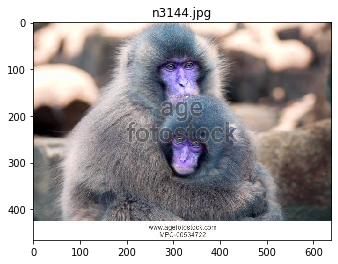

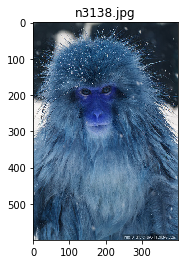

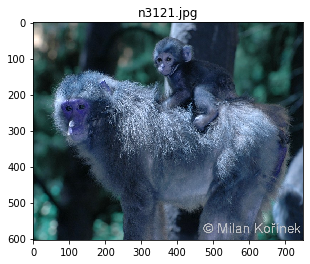

In [19]:
print(labels[3])
image_show(3,'n3')

In [79]:
from tqdm import tqdm
import skimage.transform
def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['n0']:
                label = 0
            elif folderName in ['n1']:
                label = 1
            elif folderName in ['n2']:
                label = 2
            elif folderName in ['n3']:
                label = 3
            elif folderName in ['n4']:
                label = 4
            elif folderName in ['n5']:
                label = 5
            elif folderName in ['n6']:
                label = 6
            elif folderName in ['n7']:
                label = 7
            elif folderName in ['n8']:
                label = 8
            elif folderName in ['n9']:
                label = 9
            else:
                label = 10
            for image_filename in tqdm(os.listdir(str(folder) + '/' + folderName)):
                img_file = cv2.imread(str(folder) + '/' + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir)
X_test, y_test= get_data(test_dir)

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:21<00:00,  1.19it/s]


In [80]:
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 10)
y_testHot = to_categorical(y_test, num_classes = 10)

In [81]:
num_classes = 10
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [82]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 36, 36, 64)       

In [88]:
history = model.fit(X_train,y_trainHot, epochs=5, validation_data=(X_test,y_testHot), verbose=1,batch_size = 1)
# y_testHot

Epoch 1/5
1098/1098 [==============================] - 120s 109ms/step - loss: 2.3119 - acc: 0.0893 - val_loss: 2.3020 - val_acc: 0.1103
Epoch 2/5
1098/1098 [==============================] - 121s 110ms/step - loss: 2.3038 - acc: 0.0947 - val_loss: 2.3017 - val_acc: 0.1103
Epoch 3/5
1098/1098 [==============================] - 124s 113ms/step - loss: 2.3036 - acc: 0.1111 - val_loss: 2.3016 - val_acc: 0.1103
Epoch 4/5
1098/1098 [==============================] - 124s 113ms/step - loss: 2.3032 - acc: 0.1084 - val_loss: 2.3016 - val_acc: 0.1103
Epoch 5/5
1098/1098 [==============================] - 126s 115ms/step - loss: 2.3039 - acc: 0.1056 - val_loss: 2.3016 - val_acc: 0.1103


In [92]:
score = model.evaluate(X_test,y_testHot, verbose=0)
print('accuracy:', score[1], '\n')

accuracy: 0.11029411852359772 



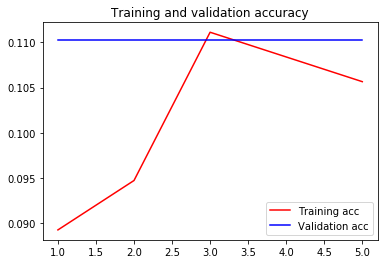

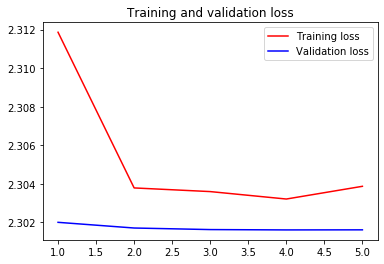

In [139]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [127]:
#with scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(y_trainHot)
y_trainHot1 = scaler.transform(y_trainHot)
y_testHot1 = scaler.transform(y_testHot)

In [128]:
num_classes = 10
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

In [129]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_29 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 36, 36, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 64)       

In [130]:
history1 = model1.fit(X_train,y_trainHot1, epochs=5, validation_data=(X_test,y_testHot1), verbose=1)

Epoch 1/5
35/35 [==============================] - 44s 1s/step - loss: -1292.2365 - acc: 0.1257 - val_loss: -10082.3311 - val_acc: 0.1875
Epoch 2/5
35/35 [==============================] - 47s 1s/step - loss: -343748.3125 - acc: 0.1002 - val_loss: -2857977.0000 - val_acc: 0.1140
Epoch 3/5
35/35 [==============================] - 48s 1s/step - loss: -13003757.0000 - acc: 0.1211 - val_loss: -75697256.0000 - val_acc: 0.1140
Epoch 4/5
35/35 [==============================] - 49s 1s/step - loss: -164611680.0000 - acc: 0.1084 - val_loss: -566307328.0000 - val_acc: 0.1103
Epoch 5/5
35/35 [==============================] - 49s 1s/step - loss: -1352128896.0000 - acc: 0.0974 - val_loss: -3170531072.0000 - val_acc: 0.1103


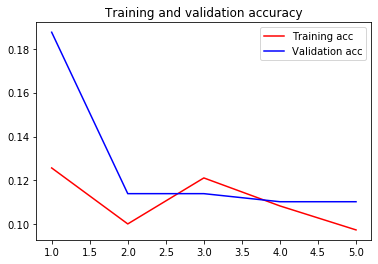

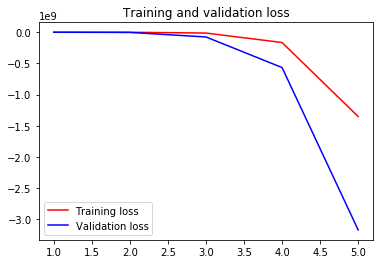

In [140]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [148]:
model.save('cifar101.h5')

In [147]:
for i in range(0,4):
    predicted_value = model.predict(X_test[[i],:])
    predict_classes = model.predict_classes(X_test[[i],:])
    actual_value = y_testHot[[i],:]
    print("Actual Value for :" + str(i+1) + ' Image ' + str(numpy.argmax(actual_value)))
    print("Predicted Value for " + str(i+1) + ' Image ' + str(predict_classes[0])+'\n')

Actual Value for :1 Image 0
Predicted Value for 1 Image 3

Actual Value for :2 Image 0
Predicted Value for 2 Image 3

Actual Value for :3 Image 0
Predicted Value for 3 Image 3

Actual Value for :4 Image 0
Predicted Value for 4 Image 3

